# Task 3 - Model Explainability
Model explainability is crucial for understanding, trust, and debugging in machine learning models. I will use SHAP (SHapley Additive exPlanations) and LIME (Local Interpretable Model-agnostic Explanations) to interpret the models I built for fraud detection.

Using SHAP and LIME for Explainability of the model trained with E-commerce dataset

In [1]:
import os, sys
import pandas as pd
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))
from data_processor import DataPreprocessor
# Configure logging
from logger import SetupLogger
logger = SetupLogger(log_file='../logs/notebooks.log').get_logger()

In [2]:
load_fraud = DataPreprocessor(filepath='../data/processed_fraud_data.csv', logger=logger)
fraud_data = load_fraud.load_dataset().set_index('user_id')

In [3]:
# Convert datetime columns
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'],format='%Y-%m-%d %H:%M:%S'  # Specify format if needed
)
fraud_data['signup_time'] = pd.to_datetime(
    fraud_data['signup_time'], 
    format='%Y-%m-%d %H:%M:%S'
)

# Extract numerical features
fraud_data['purchase_hour'] = fraud_data['purchase_time'].dt.hour
fraud_data['purchase_day'] = fraud_data['purchase_time'].dt.dayofweek
fraud_data['signup_hour'] = fraud_data['signup_time'].dt.hour
fraud_data['signup_day'] = fraud_data['signup_time'].dt.dayofweek

# Drop original datetime columns
fraud_data = fraud_data.drop(columns=['purchase_time', 'signup_time'])

In [4]:
# Drop device_id
fraud_data = fraud_data.drop(columns=['device_id'])
# Drop ip_address
fraud_data = fraud_data.drop(columns=['ip_address'])

In [5]:
bool_cols = fraud_data.select_dtypes(include='bool').columns.tolist()
fraud_data[bool_cols] = fraud_data[bool_cols].astype('int64')

In [6]:
from data_preparation import DataPreparation
# Assuming df_fraud is the DataFrame for the fraud dataset
_fraud = DataPreparation(fraud_data, target_column='class')
_fraud.train_test_split(test_size=0.2, random_state=42)

# Retrieving the train and test sets
X_train_fd, X_test_fd, y_train_fd, y_test_fd = _fraud.get_train_test_data()

Data split into training and testing sets successfully.


**Load a Pre-trained Model using joblib**

In this step, we load a pre-trained Gradient Boosting model saved in a .pkl file.

In [7]:
import joblib 
model = joblib.load('../app/gradient_boosting_fraud_best_model.pkl')  # Load the saved model

In [8]:
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', GradientBoostingClassifier())])

**Check the Model Type**

In [9]:
type(model)

sklearn.pipeline.Pipeline

In [10]:
import shap

**Extract the Model from a Pipeline**

In [11]:
model = model.steps[-1][1]

**Create a SHAP Explainer for the Model** 

To explain the predictions of a tree-based model using SHAP, you can create a TreeExplainer:

In [12]:
# Create SHAP explainer
explainer = shap.TreeExplainer(model)

**SHAP Explainer Object Example:**

When you run explainer, it will give you an object representing the SHAP explainer for your model.

In [13]:
explainer

In [14]:
# Calculate SHAP values for all samples
shap_values = explainer.shap_values(X_test_fd)

**Generating SHAP Summary Plot**

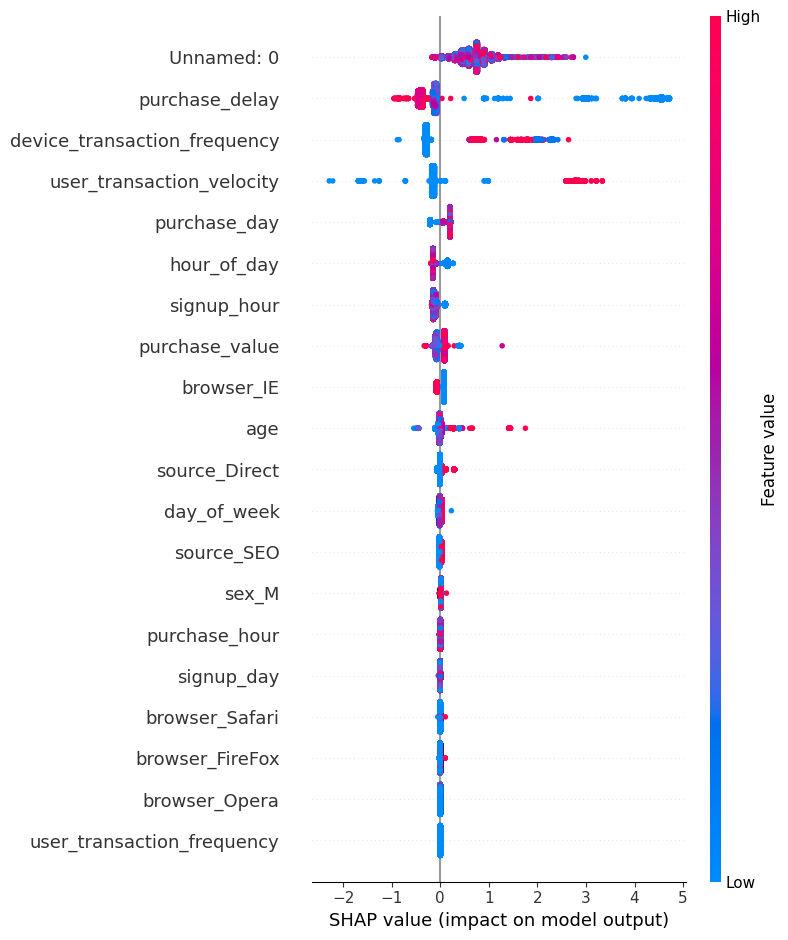

In [15]:
shap.summary_plot(shap_values, X_test_fd, show=True)

**What This Plot Represents:**

**Feature Importance:** The features are ranked by their importance in the model.
**SHAP Values:** Each dot represents a SHAP value for an instance.

The color indicates the feature value (red = high, blue = low).
Dots to the right of the centerline indicate a positive impact on the prediction, while those on the left have a negative impact.

 Imports the SHAP library for model explainability.
 
 Initializes SHAP's JavaScript visualizations for inline plotting 

In [16]:
import shap
shap.initjs()

**SHAP Force Plot**

This notebook demonstrates how to use SHAP (SHapley Additive exPlanations) to generate an interactive force plot for explaining machine learning model predictions.

In [17]:
sample_index = 1  # Or any valid index in the range of shap_values
shap.plots.force(explainer.expected_value[0], shap_values[sample_index])

In [18]:
sample_index = 1  # Or any valid index in the range of shap_values
shap.plots.force(explainer.expected_value[0], shap_values[sample_index])

In [19]:
from model_explainer import ModelExplainer

# Model Explanation Using SHAP and LIME

This section demonstrates how to use the `ModelExplainer` class to generate explanations for a machine learning model's predictions using SHAP and LIME. We will load a trained model and use it to explain a sample instance from the test dataset.

Generating SHAP explanations...
[[ 1.04325111e+00  1.71533643e-02 -8.63020495e-03 ...  1.99739343e-01
  -1.43303494e-01 -1.17915146e-03]
 [ 7.51068486e-01  9.02383909e-02  1.96811759e-02 ...  1.99739343e-01
  -9.45534911e-02  2.23805617e-03]
 [ 4.13589820e-01  2.81999997e-02 -7.03221422e-02 ...  2.00577280e-01
  -1.46995946e-01 -1.17915146e-03]
 ...
 [ 4.48244482e-01 -4.21410650e-02 -3.48834221e-02 ...  2.02292266e-01
  -1.42640800e-01 -1.17915146e-03]
 [ 4.44067364e-01 -7.13536835e-02  5.37457314e-04 ...  1.99739343e-01
  -1.31692230e-01 -1.17915146e-03]
 [ 9.00122545e-01  9.02383909e-02  1.96811759e-02 ...  1.99739343e-01
  -9.45534911e-02  9.91415761e-04]]
Shape of SHAP values: (30223, 20)
Shape of X_test: (30223, 20)


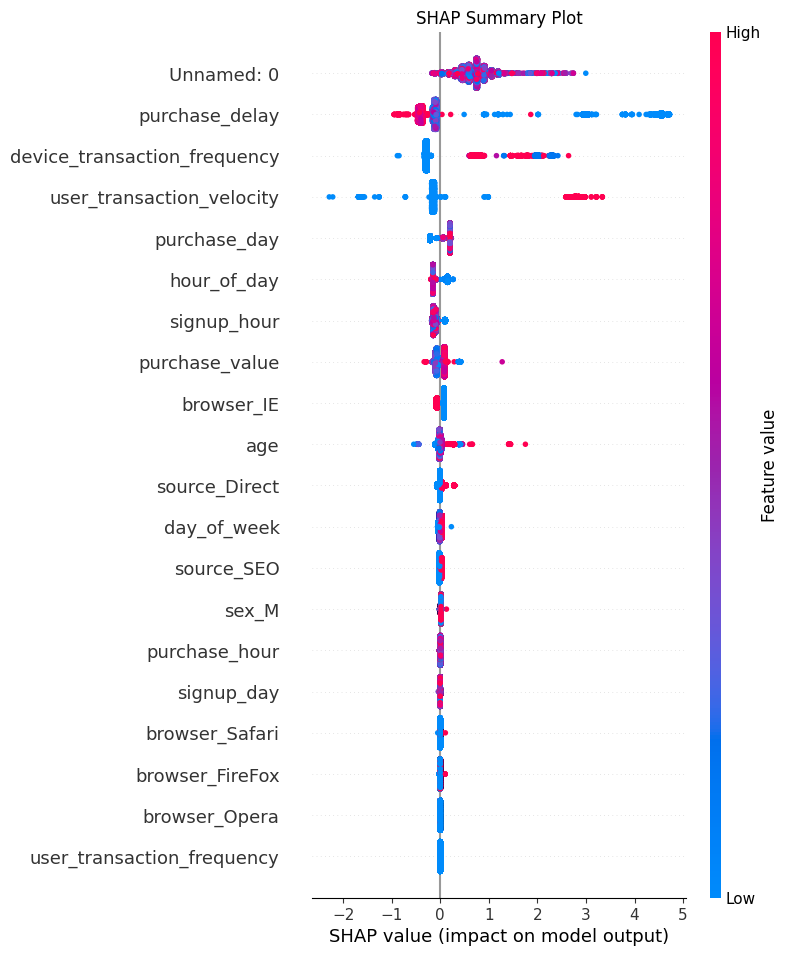

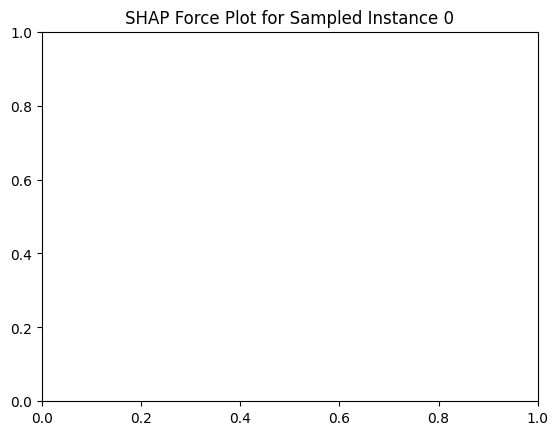

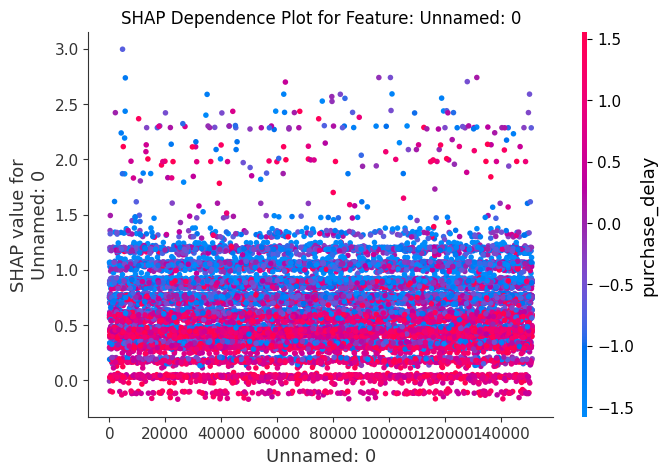

Generating LIME explanations...


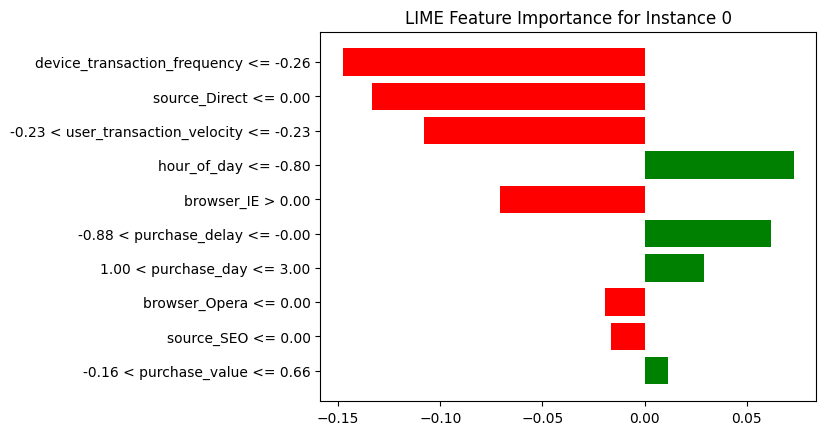

In [20]:
# Create instance of the class
fraud_explainer = ModelExplainer('../app/gradient_boosting_fraud_best_model.pkl', X_test_fd)
# Explains the first instance in the dataset
fraud_explainer.explain_model(instance_idx=0)

In [21]:
import shap
print(shap.__version__)

0.46.0
